In [28]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import copy
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import os
import eofs.standard as Eof_st
from eofs.multivariate.standard import MultivariateEof

from scipy.signal import butter, lfilter
from scipy.signal import convolve

import utilities

import importlib
def reimport_module(module_name):
    """
    Reimports the specified Python module.
    
    Args:
    module_name (module): The module to be reimported, typically passed as a variable.
    
    Returns:
    module: The reloaded module.
    """
    try:
        # Reload the already imported module
        reloaded_module = importlib.reload(module_name)
        print(f"Module {module_name.__name__} reloaded successfully.")
        return reloaded_module
    except Exception as e:
        print(f"Failed to reload module: {e}")

reimport_module(utilities)

Module utilities reloaded successfully.


<module 'utilities' from '/glade/work/wchapman/CMJO_Diagnostics_Tool/utilities.py'>

## Settings

In [50]:
print(f'You are required to run the 13_Generate_EOFS.sh routine before this one...')

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/ERA5_data/ts'

# filolr =  'ERA5.h1.FLUT.anomalies.1979010100000-2010123100000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'ERA5.h1.U850.anomalies.1979010100000-2010123100000.nc'
# var_name_u850 = 'U850'
# filv850 = 'ERA5.h1.V850.anomalies.1979010100000-2010123100000.nc'
# var_name_v850 = 'V850'
# filu200 = 'ERA5.h1.U200.anomalies.1979010100000-2010123100000.nc' 
# var_name_u200 = 'U200'
# filz500 = 'ERA5.h1.Z500.anomalies.1979010100000-2010123100000.nc'
# var_name_z500 = 'Z500'
# z500_factor=1

# phases_in = 'ERA5.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo/ts/'
# filolr =  'f.e.FTORCHmjo_CNTRLmjo.cam.h1.FLUT.anomalies.1979010100000-2010122200000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'f.e.FTORCHmjo_CNTRLmjo.cam.h1.U850.anomalies.1979010100000-2010122200000.nc'
# var_name_u850 = 'U850'
# filu200 = 'f.e.FTORCHmjo_CNTRLmjo.cam.h1.U200.anomalies.1979010100000-2010122200000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'f.e.FTORCHmjo_CNTRLmjo.cam.h1.V850.anomalies.1979010100000-2010122200000.nc'
# var_name_v850 = 'V850'
# filz500 = 'f.e.FTORCHmjo_CNTRLmjo.cam.h1.Z500.anomalies.1979010100000-2010122200000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'f.e.FTORCHmjo_CNTRLmjo.cam.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_MEANmjo/ts/'
# filolr =  'f.e.FTORCHmjo_MEANmjo.cam.h1.FLUT.anomalies.1979010100000-2010122200000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'f.e.FTORCHmjo_MEANmjo.cam.h1.U850.anomalies.1979010100000-2010122200000.nc'
# var_name_u850 = 'U850'
# filu200 = 'f.e.FTORCHmjo_MEANmjo.cam.h1.U200.anomalies.1979010100000-2010122200000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'f.e.FTORCHmjo_MEANmjo.cam.h1.V850.anomalies.1979010100000-2010122200000.nc'
# var_name_v850 = 'V850'
# filz500 = 'f.e.FTORCHmjo_MEANmjo.cam.h1.Z500.anomalies.1979010100000-2010122200000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'f.e.FTORCHmjo_MEANmjo.cam.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNNmjo/ts/'
# filolr =  'f.e.FTORCHmjo_CNNmjo.cam.h1.FLUT.anomalies.1979010100000-2010122200000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'f.e.FTORCHmjo_CNNmjo.cam.h1.U850.anomalies.1979010100000-2010122200000.nc'
# var_name_u850 = 'U850'
# filu200 = 'f.e.FTORCHmjo_CNNmjo.cam.h1.U200.anomalies.1979010100000-2010122200000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'f.e.FTORCHmjo_CNNmjo.cam.h1.V850.anomalies.1979010100000-2010122200000.nc'
# var_name_v850 = 'V850'
# filz500 = 'f.e.FTORCHmjo_CNNmjo.cam.h1.Z500.anomalies.1979010100000-2010122200000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'f.e.FTORCHmjo_CNNmjo.cam.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_meanGPU_exp001/ts/'
# filolr =  'f.e.FTORCHmjo_meanGPU_exp001.cam.h1.FLUT.anomalies.1979010100000-2010123100000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'f.e.FTORCHmjo_meanGPU_exp001.cam.h1.U850.anomalies.1979010100000-2010123100000.nc'
# var_name_u850 = 'U850'
# filu200 = 'f.e.FTORCHmjo_meanGPU_exp001.cam.h1.U200.anomalies.1979010100000-2010123100000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'f.e.FTORCHmjo_meanGPU_exp001.cam.h1.V850.anomalies.1979010100000-2010123100000.nc'
# var_name_v850 = 'V850'
# filz500 = 'f.e.FTORCHmjo_meanGPU_exp001.cam.h1.Z500.anomalies.1979010100000-2010123100000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'f.e.FTORCHmjo_meanGPU_exp001.cam.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################
dir_out = f'{dir_in}/mjo_diag/'
# Check if the directory exists
if not os.path.exists(dir_out):
    # Create the directory
    os.makedirs(dir_out)
    print(f"Directory {dir_out} created.")
    
save_Fig_out = f'{dir_out}/{filolr.split(var_name_olr)[0]}MJO_COMPOSITE_Telconnections_{var_name_olr}_{var_name_u200}_{var_name_u850}.png'
print(f'saving figure to {save_Fig_out}')

You are required to run the 13_Generate_EOFS.sh routine before this one...
saving figure to /glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_MEANmjo/ts//mjo_diag//f.e.FTORCHmjo_MEANmjo.cam.h1.MJO_COMPOSITE_Telconnections_FLUT_U200_U850.png


## Read in Data

In [51]:
# precip: 
file_path_olr = os.path.join(dir_in, filolr)  # Join the directory and file name
DS_olr = xr.open_dataset(file_path_olr)

# u200: 
file_path_u200 = os.path.join(dir_in, filu200)  # Join the directory and file name
DS_u200 = xr.open_dataset(file_path_u200)

# u850: 
file_path_u850 = os.path.join(dir_in, filu850)  # Join the directory and file name
DS_u850 = xr.open_dataset(file_path_u850)

# v850: 
file_path_v850 = os.path.join(dir_in, filv850)  # Join the directory and file name
DS_v850 = xr.open_dataset(file_path_v850)

# z500: 
file_path_z500 = os.path.join(dir_in, filz500)  # Join the directory and file name
DS_z500 = xr.open_dataset(file_path_z500)*z500_factor


# DS_phases
file_path_phases = os.path.join(dir_out, phases_in)  # Join the directory and file name
DS_phases = xr.open_dataset(file_path_phases)

#create cosine latitude weighting: 
weights = np.cos(np.deg2rad(DS_u200.lat))

## Filter Data

In [52]:
# Define bandpass frequency limits
f_low = 100  # Corresponds to  days period
f_high = 20   # Corresponds to 20 days period

u850_f = utilities.bandpass_filter_via_fft_3d(np.array(DS_u850[var_name_u850]), f_high, f_low, sampling_interval = 1)
DS_u850['U850_f'] = (('time', 'lat', 'lon'), u850_f)
print('..1..')
v850_f = utilities.bandpass_filter_via_fft_3d(np.array(DS_v850[var_name_v850]), f_high, f_low, sampling_interval = 1)
DS_v850['V850_f'] = (('time', 'lat', 'lon'), v850_f)
print('..2..')
u200_f = utilities.bandpass_filter_via_fft_3d(np.array(DS_u200[var_name_u200]), f_high, f_low, sampling_interval = 1)
DS_u200['U200_f'] = (('time', 'lat', 'lon'), u200_f)
print('..3..')
olr_f = utilities.bandpass_filter_via_fft_3d(np.array(DS_olr[var_name_olr]), f_high, f_low, sampling_interval = 1)
DS_olr['OLR_f'] = (('time', 'lat', 'lon'), olr_f)
print('..4..')
olr = DS_olr['OLR_f']
u200 = DS_u200['U200_f']
u850 = DS_u850['U850_f']
v850 = DS_v850['V850_f']

..1..
..2..
..3..
..4..


## Wintertime Baby!

In [53]:
NDFJMA_u200 = DS_u200.where((DS_u200['time.month'] >= 11) | (DS_u200['time.month'] <= 5), drop=True)
NDFJMA_u850 = DS_u850.where((DS_u850['time.month'] >= 11) | (DS_u850['time.month'] <= 5), drop=True)
NDFJMA_v850 = DS_v850.where((DS_v850['time.month'] >= 11) | (DS_v850['time.month'] <= 5), drop=True)
NDFJMA_olr = DS_olr.where((DS_olr['time.month'] >= 11) | (DS_olr['time.month'] <= 5), drop=True)
NDFJMA_phases = DS_phases.where((DS_phases['time.month'] >= 11) | (DS_phases['time.month'] <= 5), drop=True)

## Plot it

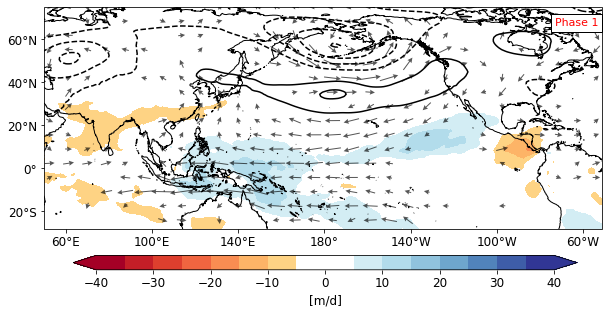

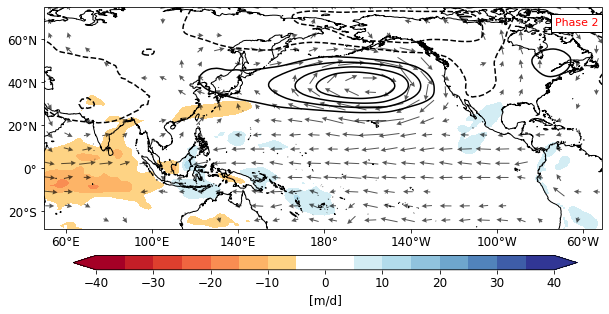

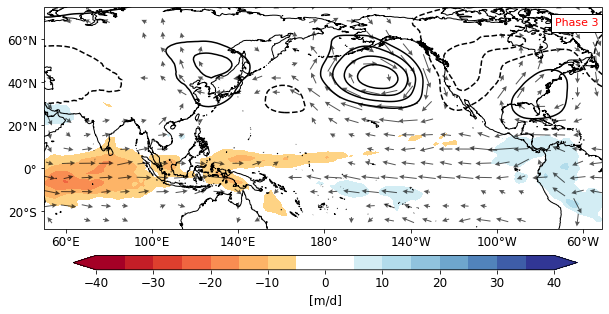

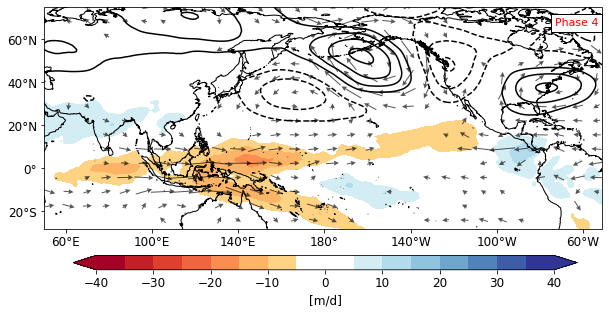

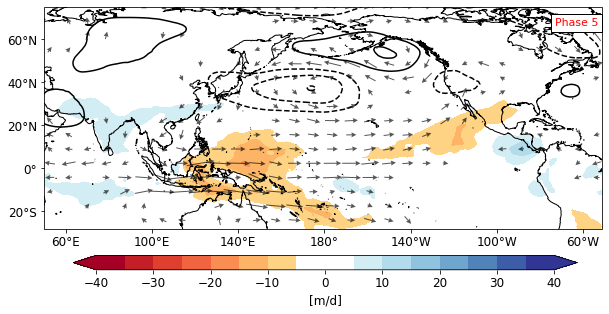

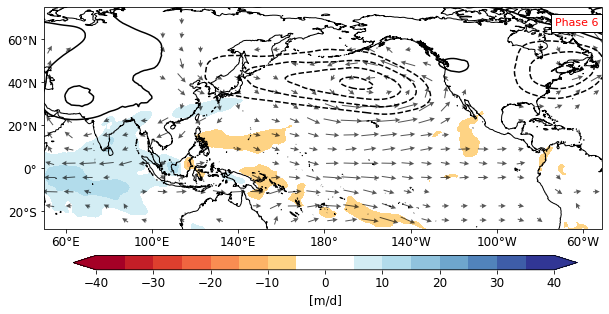

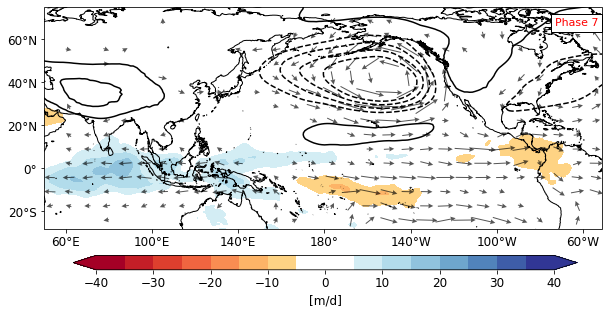

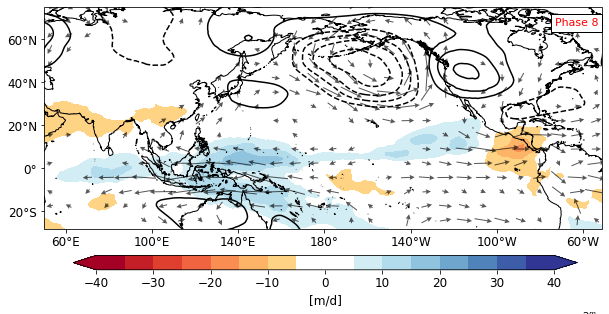

In [54]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)
clevs = np.arange(-40, 45, 5)
clevs_cont = np.array([-400,-300,-200,-100,100,200,300,400])
bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
nnn = int(np.floor(newcolors.shape[0]/2))
newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
cmapzzz = ListedColormap(newcolors)

#begin fig
proj = ccrs.PlateCarree(central_longitude=180)

lvlv = 1000
varvar = 'Nudge_U'
varvarm = 'NDJFM_U'
for phs in range(1,9):
    inds = np.where(NDFJMA_phases['RMMphase_obs']==phs)[0]

    inds_tele = np.where(DS_phases['RMMphase_obs']==phs)[0]
    average_future = sorted(np.concatenate([inds_tele+5,inds_tele+6,inds_tele+7,inds_tele+8]))
    filtered_list = [x for x in average_future if x <= (len(DS_z500['time'])-1)]
    filtered_list = list(np.unique(filtered_list))

    v = DS_v850.isel(time=filtered_list)
    v = v.where((v['time.month'] >= 12) | (v['time.month'] <= 3), drop=True)
    v = v.mean('time')['V850_f']

    u = DS_u850.isel(time=filtered_list)
    u = u.where((u['time.month'] >= 12) | (u['time.month'] <= 3), drop=True)
    u = u.mean('time')['U850_f']
    
    fig = plt.figure(figsize=(10, 5))  # Adjusted figure size for 8 panels
    ax = plt.subplot(1, 1, 1, projection=proj)  # Dynamic subplot creation
    ax.coastlines('50m')

    z_plot = DS_z500.isel(time=filtered_list)
    z_plot = z_plot.where((z_plot['time.month'] >= 12) | (z_plot['time.month'] <= 3), drop=True)
    z_plot = z_plot.mean('time')['Z500']
    
    pfield = NDFJMA_olr.isel(time=inds).mean('time')['OLR_f']

    # Apply the mask: Replace vectors with small magnitudes with NaNs
    mask = np.sqrt(u**2 + v**2) < .5
    u = np.where(mask, np.nan, u)
    v = np.where(mask, np.nan, v)

    lon, lat = np.meshgrid(pfield['lon'].values, pfield['lat'].values)


    # Subsampling for quiver plot clarity
    skip = (slice(None, None, 7), slice(None, None, 7))
    
    # Plotting
    bb = ax.contourf(lon - 180, lat, pfield, levels=clevs, cmap=cmapzzz, transform=proj, extend='both')
    bb2 = ax.contour(lon - 180, lat, z_plot, levels=clevs_cont, transform=proj, extend='both',colors='k')
    q = ax.quiver(lon[skip], lat[skip], u[skip], v[skip],pivot="middle", transform=ccrs.PlateCarree(),
                  color='black', scale=50, alpha=0.66,linewidths=0.01, width=0.0018,headwidth=5)

    # place a text box in upper left in axes coords
    
    if phs == 8:
        qk = ax.quiverkey(q, 0.95, -.4, 2, r'$2 \frac{m}{s}$', labelpos='E',
                       transform=ax.transAxes, color='black')

    # Set ticks, labels, and title dynamically
    if phs < 9:
        ax.set_xticks([20, 60, 100, 140, 180, 220, 260, 300, 340], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    else:
        ax.set_xticks([], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    
    ax.set_yticks(np.arange(-60, 70, 20), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.tick_params(labelsize=12)
    ax.set_extent([50, 309, -28, 75], crs=ccrs.PlateCarree())
    props = dict(facecolor='white', alpha=1)
    ax.text(.993, 0.95, f'Phase {phs}', color='red', transform=ax.transAxes, fontsize=11, verticalalignment='top'
            , horizontalalignment='right', bbox=props)
    
    # Add a colorbar at the bottom of the figure
    # Use the axes_list for positioning
    cbar_ax = fig.add_axes([0.165, 0.08, 0.7, 0.04])  # [left, bottom, width, height] in figure coordinate
    cbar=fig.colorbar(bb, cax=cbar_ax, orientation='horizontal', label='[m/d]')
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='[m/d]',fontsize=12)
    fig.subplots_adjust(hspace=0.002,wspace=0.001)  # Adjust spacing as needed
    svOut = f'{save_Fig_out.split(".png")[0]}_phase{phs:02}.png'
    plt.savefig(svOut,bbox_inches='tight',dpi=400)
    plt.show()


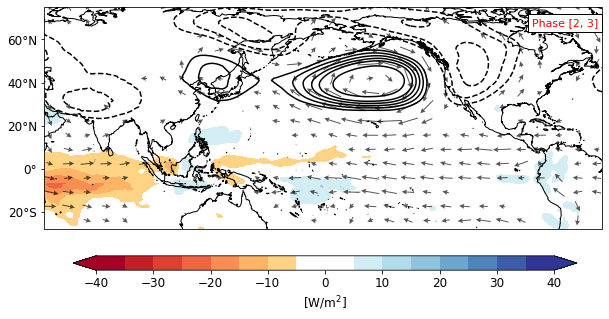

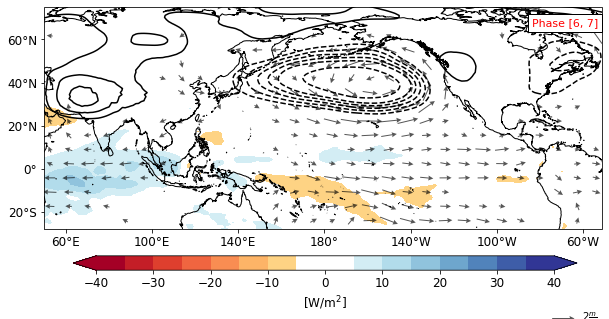

In [55]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

def get_list_future(DS,varname,nummy):
    inds_tele = np.where(DS[varname]==nummy)[0]
    average_future = sorted(np.concatenate([inds_tele+5,inds_tele+6,inds_tele+7,inds_tele+8]))
    fl = [x for x in average_future if x <= len(DS_z500['time'])-1]
    fl = list(np.unique(fl))
    return fl

def get_list(DS,varname,nummy):
    inds_tele = np.where(DS[varname]==nummy)[0]
    average_future = sorted(np.concatenate([inds_tele]))
    fl = [x for x in average_future if x <= len(DS_z500['time'])-1]
    fl = list(np.unique(fl))
    return fl

clevs = np.arange(-40, 45, 5)
clevs_cont = np.array([-400, -300,-250, -200, -150, -100, 100, 150, 200, 250, 300, 400])
bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
nnn = int(np.floor(newcolors.shape[0]/2))
newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
cmapzzz = ListedColormap(newcolors)

#begin fig
proj = ccrs.PlateCarree(central_longitude=180)

lvlv = 1000
varvar = 'Nudge_U'
varvarm = 'NDJFM_U'
for ee,phs in enumerate([[2,3],[6,7]]):
    inds = []
    for ii in phs:
        inds+=get_list(DS_phases,'RMMphase_obs',ii)
    inds = list(np.unique(inds))

    filtered_list = []
    for ii in phs:
        filtered_list+=get_list_future(DS_phases,'RMMphase_obs',ii)
    filtered_list = list(np.unique(filtered_list))

    v = DS_v850.isel(time=filtered_list)
    # v = v.where((v['time.month'] >= 12) | (v['time.month'] <= 3), drop=True)
    v = v.where((v['time.month'] <= 3), drop=True)
    v = v.mean('time')['V850_f']

    u = DS_u850.isel(time=filtered_list)
    # u = u.where((u['time.month'] >= 12) | (u['time.month'] <= 3), drop=True)
    u = u.where((u['time.month'] <= 3), drop=True)
    u = u.mean('time')['U850_f']
    
    fig = plt.figure(figsize=(10, 5))  # Adjusted figure size for 8 panels
    ax = plt.subplot(1, 1, 1, projection=proj)  # Dynamic subplot creation
    ax.coastlines('50m')

    z_plot = DS_z500.isel(time=filtered_list)
    # z_plot = z_plot.where((z_plot['time.month'] >= 11) | (z_plot['time.month'] <= 3), drop=True)
    z_plot = z_plot.where((z_plot['time.month'] <= 3), drop=True)
    z_plot = z_plot.mean('time')['Z500']
    
    pfield = DS_olr.isel(time=inds)
    # pfield = pfield.where((pfield['time.month'] >= 11) | (pfield['time.month'] <= 3), drop=True)
    pfield = pfield.where((pfield['time.month'] <= 3), drop=True)
    pfield = pfield.mean('time')['OLR_f']

    # Apply the mask: Replace vectors with small magnitudes with NaNs
    mask = np.sqrt(u**2 + v**2) < .5
    u = np.where(mask, np.nan, u)
    v = np.where(mask, np.nan, v)

    lon, lat = np.meshgrid(pfield['lon'].values, pfield['lat'].values)


    # Subsampling for quiver plot clarity
    skip = (slice(None, None, 7), slice(None, None, 7))
    
    # Plotting
    bb = ax.contourf(lon - 180, lat, pfield, levels=clevs, cmap=cmapzzz, transform=proj, extend='both')
    bb2 = ax.contour(lon - 180, lat, z_plot, levels=clevs_cont, transform=proj, extend='both',colors='k')
    q = ax.quiver(lon[skip], lat[skip], u[skip], v[skip],pivot="middle", transform=ccrs.PlateCarree(),
                  color='black', scale=50, alpha=0.66,linewidths=0.01, width=0.0018,headwidth=5)

    # place a text box in upper left in axes coords
    
    if ee == 1:
        qk = ax.quiverkey(q, 0.95, -.4, 2, r'$2 \frac{m}{s}$', labelpos='E',
                       transform=ax.transAxes, color='black')

    # Set ticks, labels, and title dynamically
    if ee == 1:
        ax.set_xticks([20, 60, 100, 140, 180, 220, 260, 300, 340], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    else:
        ax.set_xticks([], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    
    ax.set_yticks(np.arange(-60, 70, 20), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.tick_params(labelsize=12)
    ax.set_extent([50, 309, -28, 75], crs=ccrs.PlateCarree())
    props = dict(facecolor='white', alpha=1)
    ax.text(.993, 0.95, f'Phase {phs}', color='red', transform=ax.transAxes, fontsize=11, verticalalignment='top'
            , horizontalalignment='right', bbox=props)
    
    # Add a colorbar at the bottom of the figure
    # Use the axes_list for positioning
    cbar_ax = fig.add_axes([0.165, 0.08, 0.7, 0.04])  # [left, bottom, width, height] in figure coordinate
    cbar=fig.colorbar(bb, cax=cbar_ax, orientation='horizontal', label='[m/d]')
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='[W/m${^2}$]',fontsize=12)
    fig.subplots_adjust(hspace=0.002,wspace=0.001)  # Adjust spacing as needed
    svOut = f'{save_Fig_out.split(".png")[0]}_phase_{phs[0]:02}_{phs[1]:02}_JFM.png'
    plt.savefig(svOut,bbox_inches='tight',dpi=400)
    plt.show()


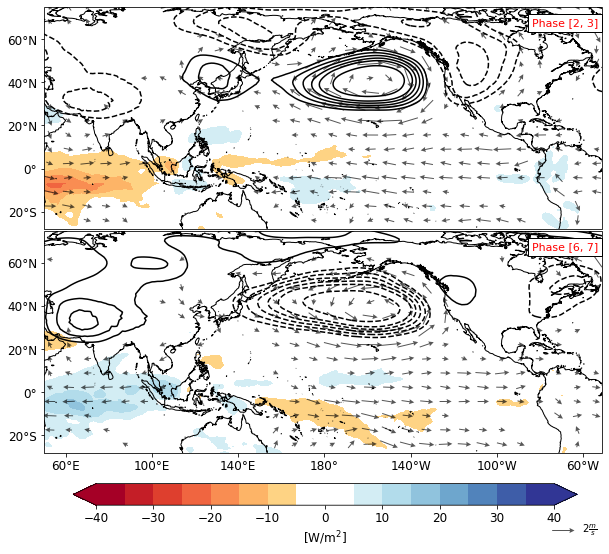

In [56]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

def get_list_future(DS,varname,nummy):
    inds_tele = np.where(DS[varname]==nummy)[0]
    average_future = sorted(np.concatenate([inds_tele+5,inds_tele+6,inds_tele+7,inds_tele+8]))
    fl = [x for x in average_future if x <= len(DS_z500['time'])-1]
    fl = list(np.unique(fl))
    return fl

def get_list(DS,varname,nummy):
    inds_tele = np.where(DS[varname]==nummy)[0]
    average_future = sorted(np.concatenate([inds_tele]))
    fl = [x for x in average_future if x <= len(DS_z500['time'])-1]
    fl = list(np.unique(fl))
    return fl

clevs = np.arange(-40, 45, 5)
clevs_cont = np.array([-400, -300,-250, -200, -150, -100, 100, 150, 200, 250, 300, 400])
bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
nnn = int(np.floor(newcolors.shape[0]/2))
newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
cmapzzz = ListedColormap(newcolors)

#begin fig
proj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(10, 10))  # Adjusted figure size for 8 panels
lvlv = 1000
varvar = 'Nudge_U'
varvarm = 'NDJFM_U'
for ee,phs in enumerate([[2,3],[6,7]]):
    inds = []
    for ii in phs:
        inds+=get_list(DS_phases,'RMMphase_obs',ii)
    inds = list(np.unique(inds))

    filtered_list = []
    for ii in phs:
        filtered_list+=get_list_future(DS_phases,'RMMphase_obs',ii)
    filtered_list = list(np.unique(filtered_list))

    v = DS_v850.isel(time=filtered_list)
    v = v.where((v['time.month'] <= 3), drop=True)
    v = v.mean('time')['V850_f']

    u = DS_u850.isel(time=filtered_list)
    u = u.where((u['time.month'] <= 3), drop=True)
    u = u.mean('time')['U850_f']
    
    ax = plt.subplot(2, 1, ee+1, projection=proj)  # Dynamic subplot creation
    ax.coastlines('50m')

    z_plot = DS_z500.isel(time=filtered_list)
    z_plot = z_plot.where((z_plot['time.month'] <= 3), drop=True)
    z_plot = z_plot.mean('time')['Z500']
    
    pfield = DS_olr.isel(time=inds)
    pfield = pfield.where((pfield['time.month'] <= 3), drop=True)
    pfield = pfield.mean('time')['OLR_f']

    # Apply the mask: Replace vectors with small magnitudes with NaNs
    mask = np.sqrt(u**2 + v**2) < .5
    u = np.where(mask, np.nan, u)
    v = np.where(mask, np.nan, v)

    lon, lat = np.meshgrid(pfield['lon'].values, pfield['lat'].values)


    # Subsampling for quiver plot clarity
    skip = (slice(None, None, 7), slice(None, None, 7))
    
    # Plotting
    bb = ax.contourf(lon - 180, lat, pfield, levels=clevs, cmap=cmapzzz, transform=proj, extend='both')
    bb2 = ax.contour(lon - 180, lat, z_plot, levels=clevs_cont, transform=proj, extend='both',colors='k')
    q = ax.quiver(lon[skip], lat[skip], u[skip], v[skip],pivot="middle", transform=ccrs.PlateCarree(),
                  color='black', scale=50, alpha=0.66,linewidths=0.01, width=0.0018,headwidth=5)

    # place a text box in upper left in axes coords
    
    if ee == 1:
        qk = ax.quiverkey(q, 0.95, -.35, 2, r'$2 \frac{m}{s}$', labelpos='E',
                       transform=ax.transAxes, color='black')

    # Set ticks, labels, and title dynamically
    if ee == 1:
        ax.set_xticks([20, 60, 100, 140, 180, 220, 260, 300, 340], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    else:
        ax.set_xticks([], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    
    ax.set_yticks(np.arange(-60, 70, 20), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.tick_params(labelsize=12)
    ax.set_extent([50, 309, -28, 75], crs=ccrs.PlateCarree())
    props = dict(facecolor='white', alpha=1)
    ax.text(.993, 0.95, f'Phase {phs}', color='red', transform=ax.transAxes, fontsize=11, verticalalignment='top'
            , horizontalalignment='right', bbox=props)

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.165, 0.12, 0.7, 0.03])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(bb, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='[W/m${^2}$]',fontsize=12)
fig.subplots_adjust(hspace=-0.3, wspace=-1.1)  # Adjust spacing as needed
svOut = f'{save_Fig_out.split(".png")[0]}_phase_02_03_06_07_JFM.png'
plt.savefig(svOut,bbox_inches='tight',dpi=400)
plt.show()


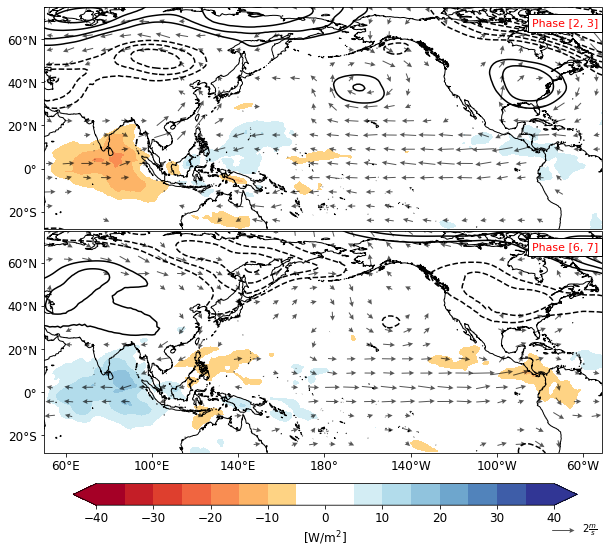

In [57]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

def get_list_future(DS,varname,nummy):
    inds_tele = np.where(DS[varname]==nummy)[0]
    average_future = sorted(np.concatenate([inds_tele+5,inds_tele+6,inds_tele+7,inds_tele+8]))
    fl = [x for x in average_future if x <= len(DS_z500['time'])-1]
    fl = list(np.unique(fl))
    return fl

def get_list(DS,varname,nummy):
    inds_tele = np.where(DS[varname]==nummy)[0]
    average_future = sorted(np.concatenate([inds_tele]))
    fl = [x for x in average_future if x <= len(DS_z500['time'])-1]
    fl = list(np.unique(fl))
    return fl

clevs = np.arange(-40, 45, 5)
clevs_cont = np.array([-400, -300,-250, -200, -150, -100, 100, 150, 200, 250, 300, 400])
bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
nnn = int(np.floor(newcolors.shape[0]/2))
newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
cmapzzz = ListedColormap(newcolors)

#begin fig
proj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(10, 10))  # Adjusted figure size for 8 panels

for ee,phs in enumerate([[2,3],[6,7]]):
    inds = []
    for ii in phs:
        inds+=get_list(DS_phases,'RMMphase_obs',ii)
    inds = list(np.unique(inds))

    filtered_list = []
    for ii in phs:
        filtered_list+=get_list_future(DS_phases,'RMMphase_obs',ii)
    filtered_list = list(np.unique(filtered_list))

    v = DS_v850.isel(time=filtered_list)
    v = v.where((v['time.month'] >= 10), drop=True)
    v = v.mean('time')['V850_f']

    u = DS_u850.isel(time=filtered_list)
    u = u.where((u['time.month'] >= 10), drop=True)
    u = u.mean('time')['U850_f']
    
    ax = plt.subplot(2, 1, ee+1, projection=proj)  # Dynamic subplot creation
    ax.coastlines('50m')

    z_plot = DS_z500.isel(time=filtered_list)
    z_plot = z_plot.where((z_plot['time.month'] >= 10), drop=True)
    z_plot = z_plot.mean('time')['Z500']
    
    pfield = DS_olr.isel(time=inds)
    pfield = pfield.where((pfield['time.month'] >= 10), drop=True)
    pfield = pfield.mean('time')['OLR_f']

    # Apply the mask: Replace vectors with small magnitudes with NaNs
    mask = np.sqrt(u**2 + v**2) < .5
    u = np.where(mask, np.nan, u)
    v = np.where(mask, np.nan, v)

    lon, lat = np.meshgrid(pfield['lon'].values, pfield['lat'].values)


    # Subsampling for quiver plot clarity
    skip = (slice(None, None, 7), slice(None, None, 7))
    
    # Plotting
    bb = ax.contourf(lon - 180, lat, pfield, levels=clevs, cmap=cmapzzz, transform=proj, extend='both')
    bb2 = ax.contour(lon - 180, lat, z_plot, levels=clevs_cont, transform=proj, extend='both',colors='k')
    q = ax.quiver(lon[skip], lat[skip], u[skip], v[skip],pivot="middle", transform=ccrs.PlateCarree(),
                  color='black', scale=50, alpha=0.66,linewidths=0.01, width=0.0018,headwidth=5)

    # place a text box in upper left in axes coords
    
    if ee == 1:
        qk = ax.quiverkey(q, 0.95, -.35, 2, r'$2 \frac{m}{s}$', labelpos='E',
                       transform=ax.transAxes, color='black')

    # Set ticks, labels, and title dynamically
    if ee == 1:
        ax.set_xticks([20, 60, 100, 140, 180, 220, 260, 300, 340], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    else:
        ax.set_xticks([], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    
    ax.set_yticks(np.arange(-60, 70, 20), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.tick_params(labelsize=12)
    ax.set_extent([50, 309, -28, 75], crs=ccrs.PlateCarree())
    props = dict(facecolor='white', alpha=1)
    ax.text(.993, 0.95, f'Phase {phs}', color='red', transform=ax.transAxes, fontsize=11, verticalalignment='top'
            , horizontalalignment='right', bbox=props)

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.165, 0.12, 0.7, 0.03])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(bb, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='[W/m${^2}$]',fontsize=12)
fig.subplots_adjust(hspace=-0.3, wspace=-1.1)  # Adjust spacing as needed
svOut = f'{save_Fig_out.split(".png")[0]}_phase_02_03_06_07_OND.png'
plt.savefig(svOut,bbox_inches='tight',dpi=400)
plt.show()


In [82]:
DDD = xr.open_dataset('/glade/campaign/collections/rda/data/ds633.1/e5.moda.fc.sfc.meanflux/2008/e5.moda.fc.sfc.meanflux.235_055_mtpr.ll025sc.2008010100_2008120100.nc').isel(time=0)

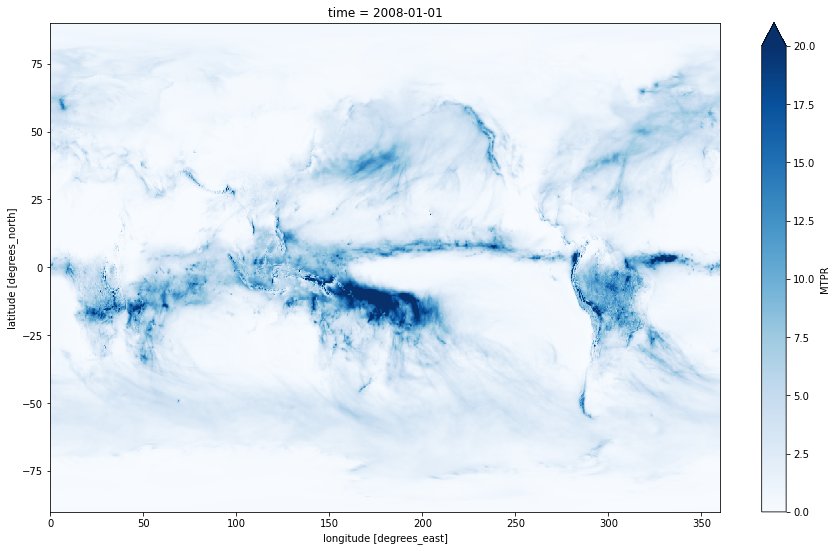

In [83]:
plt.figure(figsize=(15,9))
(DDD['MTPR']*86400).plot(vmin=0, vmax=20,cmap='Blues')
plt.show()

In [84]:
/glade/campaign/collections/rda/data/ds633.1/e5.moda.fc.sfc.meanflux/1979/e5.moda.fc.sfc.meanflux.235_055_mtpr.ll025sc.1979010100_1979120100.nc
.
.
.
/glade/campaign/collections/rda/data/ds633.1/e5.moda.fc.sfc.meanflux/2007/e5.moda.fc.sfc.meanflux.235_055_mtpr.ll025sc.2007010100_2007120100.nc
/glade/campaign/collections/rda/data/ds633.1/e5.moda.fc.sfc.meanflux/2008/e5.moda.fc.sfc.meanflux.235_055_mtpr.ll025sc.2008010100_2008120100.nc
/glade/campaign/collections/rda/data/ds633.1/e5.moda.fc.sfc.meanflux/2008/e5.moda.fc.sfc.meanflux.235_055_mtpr.ll025sc.2009010100_2009120100.nc
/glade/campaign/collections/rda/data/ds633.1/e5.moda.fc.sfc.meanflux/2010/e5.moda.fc.sfc.meanflux.235_055_mtpr.ll025sc.2010010100_2010120100.nc
.
.
.
/glade/campaign/collections/rda/data/ds633.1/e5.moda.fc.sfc.meanflux/2022/e5.moda.fc.sfc.meanflux.235_055_mtpr.ll025sc.2022010100_2022120100.nc

SyntaxError: invalid syntax (1014029320.py, line 1)

## Bootstrap the Results 

In [ ]:
bootstrap=True
if bootstrap:
    from xbootstrap import block_bootstrap

In [ ]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

for ee,phs in enumerate([[2,3],[6,7]]):
    
    filtered_list = []
    for ii in phs:
        filtered_list+=get_list_future(DS_phases,'RMMphase_obs',ii)
    filtered_list = list(np.unique(filtered_list))

    pfield = DS_z500.isel(time=filtered_list)
    pfield = pfield.where((pfield['time.month'] <= 3), drop=True)
    
    # Create 500 circularly bootstrapped resamples of ds1, ds2 and ds3
    # using a blocksize of 5 for the time dimension and 1 for the ensemble
    # dimension, and only bootstrapping the time dimension for ds2
    print('.... create block ensemble ...')
    pfield_bs = block_bootstrap(
        pfield[var_name_z500],
        blocks={"time": 25},
        n_iteration=500,
        circular=True,
    )
    
    print('....taking mean...')
    pfield_bs_mean = pfield_bs.mean('time')
    print('.... quantiles ....')
    pfield_bs_mean_quantile95 = pfield_bs_mean.quantile(q=.95, dim='iteration').to_dataset(name='Z500_mean_q95')
    pfield_bs_mean_quantile99 = pfield_bs_mean.quantile(q=.99, dim='iteration').to_dataset(name='Z500_mean_q99')
    pfield_bs_mean_quantile05 = pfield_bs_mean.quantile(q=.05, dim='iteration').to_dataset(name='Z500_mean_q05')
    pfield_bs_mean_quantile01 = pfield_bs_mean.quantile(q=.01, dim='iteration').to_dataset(name='Z500_mean_q01')
    pfield_out = pfield[var_name_z500].mean('time').to_dataset(name = 'Z500_mean')
    
    pfield_bs_mean_quantile = xr.merge([pfield_out, pfield_bs_mean_quantile01, pfield_bs_mean_quantile05, 
                                        pfield_bs_mean_quantile99,
                                        pfield_bs_mean_quantile95], compat='override')

    svOut = f'{save_Fig_out.split(".png")[0]}_MJO_Bootstrap_phase_{phs[0]:02}_{phs[1]:02}_JFM.nc'
    pfield_bs_mean_quantile.to_netcdf(svOut)

In [ ]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

for ee,phs in enumerate([[2,3],[6,7]]):
    
    filtered_list = []
    for ii in phs:
        filtered_list+=get_list_future(DS_phases,'RMMphase_obs',ii)
    filtered_list = list(np.unique(filtered_list))

    pfield = DS_z500.isel(time=filtered_list)
    pfield = pfield.where((pfield['time.month'] >= 10), drop=True)
    
    # Create 500 circularly bootstrapped resamples of ds1, ds2 and ds3
    # using a blocksize of 5 for the time dimension and 1 for the ensemble
    # dimension, and only bootstrapping the time dimension for ds2
    print('.... create block ensemble ...')
    pfield_bs = block_bootstrap(
        pfield[var_name_z500],
        blocks={"time": 25},
        n_iteration=500,
        circular=True,
    )
    
    print('....taking mean...')
    pfield_bs_mean = pfield_bs.mean('time')
    print('.... quantiles ....')
    pfield_bs_mean_quantile95 = pfield_bs_mean.quantile(q=.95, dim='iteration').to_dataset(name='Z500_mean_q95')
    pfield_bs_mean_quantile99 = pfield_bs_mean.quantile(q=.99, dim='iteration').to_dataset(name='Z500_mean_q99')
    pfield_bs_mean_quantile05 = pfield_bs_mean.quantile(q=.05, dim='iteration').to_dataset(name='Z500_mean_q05')
    pfield_bs_mean_quantile01 = pfield_bs_mean.quantile(q=.01, dim='iteration').to_dataset(name='Z500_mean_q01')
    pfield_out = pfield[var_name_z500].mean('time').to_dataset(name = 'Z500_mean')
    
    pfield_bs_mean_quantile = xr.merge([pfield_out, pfield_bs_mean_quantile01, pfield_bs_mean_quantile05, 
                                        pfield_bs_mean_quantile99,
                                        pfield_bs_mean_quantile95], compat='override')

    svOut = f'{save_Fig_out.split(".png")[0]}_MJO_Bootstrap_phase_{phs[0]:02}_{phs[1]:02}_OND.nc'
    pfield_bs_mean_quantile.to_netcdf(svOut)

# Testing Below:

# Check against BOM index

In [ ]:
# Define the path to the NOAA data file. This file contains observations related to the Madden-Julian Oscillation.
pth_txt = '/glade/work/wchapman/MJOcast/MJOcast/Observations/BOM_INDEX.txt'

# Load the data from the specified path using pandas. The data is expected to be whitespace-delimited.
dataNOAA = pd.read_csv(pth_txt, delimiter='\s+', header=0)

# Rename the columns for clarity and future reference. 
# It includes date components (year, month, day), RMM1 and RMM2 indices, phase, amplitude, and an unused 'doggy' column.
dataNOAA.columns = ["year", "month", "day", "RMM1", "RMM2", "phase", 'amplitude', 'doggy']

# Remove the 'doggy' column as it's not relevant for our analysis.
dataNOAA.drop(columns='doggy', inplace=True)

# Create a new column 'time' by combining 'year', 'month', and 'day' into a datetime object.
# This will allow for time-based indexing and operations within the dataset.
dataNOAA['time'] = pd.to_datetime(dataNOAA[['year', 'month', 'day']])

# Drop the original year, month, and day columns as they're now redundant with the 'time' column in place.
dataNOAA.drop(columns=['year', 'month', 'day'], inplace=True)

# Set the 'time' column as the DataFrame's index. 
# This is a preparatory step for conversion to xarray, facilitating time-series analysis.
dataNOAA.set_index('time', inplace=True)

# Convert the prepared pandas DataFrame to an xarray Dataset.
# This transformation leverages the datetime-indexed DataFrame to structure the dataset for multidimensional analysis.
ds = xr.Dataset.from_dataframe(dataNOAA)
ds = ds.sel(time=slice('1979','2008'))
ds['phase'] = ds['phase'].where(ds['amplitude'] >= 1, 0)
ds